In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
sns.set(style='ticks', palette='Set2')
sns.set_context("talk", font_scale=1.2)
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import tensorflow as tf

import util
import math

In [2]:
%load_ext autoreload
%autoreload 2


In [98]:
from sklearn import datasets 
boston = datasets.load_boston()

In [99]:
X = boston['data']
y = boston['target']

In [100]:
X = X / np.max(X, axis = 0)
y = y / np.max(y, axis = 0)

In [101]:
df = pd.DataFrame(X, columns = boston.feature_names)
corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ZN,-0.20,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
INDUS,0.41,-0.53,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CHAS,-0.06,-0.04,0.06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NOX,0.42,-0.52,0.76,0.09,nan,nan,nan,nan,nan,nan,nan,nan,nan
RM,-0.22,0.31,-0.39,0.09,-0.30,nan,nan,nan,nan,nan,nan,nan,nan
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,nan,nan,nan,nan,nan,nan,nan
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,nan,nan,nan,nan,nan,nan
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,nan,nan,nan,nan,nan
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,nan,nan,nan,nan


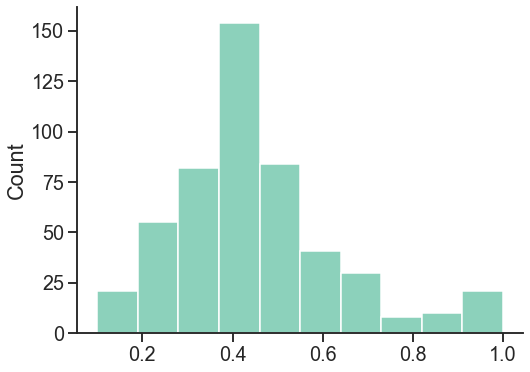

In [121]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(y, bins = 10)
sns.despine()

In [102]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def return_metrics(y_test, y_pred):
   percent_err = np.abs(y_pred - y_test) / np.abs(y_test)
   return {"mse" : mean_squared_error(y_test, y_pred),
            "r2": r2_score(y_test, y_pred)    ,
            "abs_err": mean_absolute_error(y_test, y_pred),
            "mean_abs_perc_err" :percent_err.mean()*100,
            "std_abs_perc_err" :percent_err.std()*100, }



In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)
wt, epoch, errors = util.adaline_training(X_train, y_train, epochs=1000, learning_rate=0.01, tol = 0.0001)

No handles with labels found to put in legend.


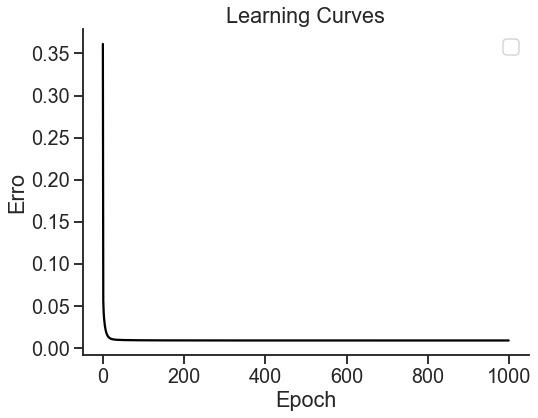

In [104]:
fig = plt.figure(figsize=(8, 6))

plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Erro')
plt.plot(range(len(errors)), errors, '-k')
plt.legend()
sns.despine()

plt.show()

No handles with labels found to put in legend.


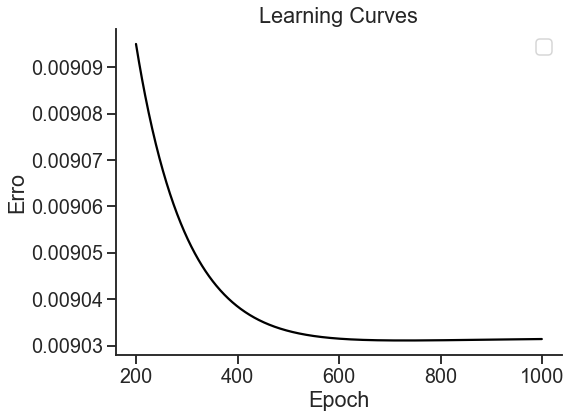

In [106]:
fig = plt.figure(figsize=(8, 6))

plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Erro')
plt.plot(range(len(errors))[200:], errors[200:], '-k')
plt.legend()
sns.despine()

plt.show()

In [105]:
y_pred = util.adaline_predict(X_test, wt)

In [107]:
metrics = return_metrics(y_test, y_pred)
metrics

{'mse': 0.009174287044023035,
 'r2': 0.7171936127348638,
 'abs_err': 0.07035170490603365,
 'mean_abs_perc_err': 17.5031021312489,
 'std_abs_perc_err': 16.47202487056829}

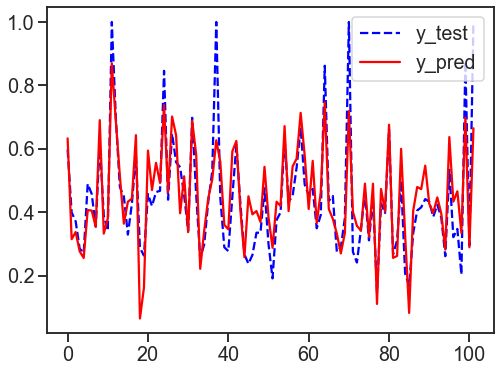

In [108]:
fig = plt.figure(figsize=(8, 6))

plt.plot(y_test, 'b--')
plt.plot(y_pred, 'r-')
plt.legend(['y_test', 'y_pred'])

In [109]:
data = []
from tqdm import tqdm
for i in tqdm(range(30)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    wt, epoch, errors = util.adaline_training(X_train, y_train, epochs=1000, learning_rate=0.01, tol = 0.0001)
    y_pred = util.adaline_predict(X_test, wt)
    metrics = return_metrics(y_test, y_pred)
    data.append(pd.DataFrame(metrics, index = [0]))

result = pd.concat(data, ignore_index = True)    

100%|██████████| 30/30 [00:47<00:00,  1.59s/it]


In [110]:
result.describe()

,mse,r2,abs_err,mean_abs_perc_err,std_abs_perc_err
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.009982,0.694336,0.069836,17.627263,19.095997
std,0.002079,0.061630,0.006556,2.190566,3.610628
min,0.006589,0.562245,0.056912,12.816416,11.868628
25%,0.008579,0.654286,0.065349,15.751089,16.641406
50%,0.009744,0.706800,0.069672,17.748519,19.337894
75%,0.010713,0.742180,0.075199,19.392617,21.232271
max,0.014264,0.789248,0.082465,21.487542,26.237594


In [111]:
len(result)

30

In [112]:
import fs

In [113]:
fs_obj = fs.FeatureSelector(pd.DataFrame(X, columns = boston.feature_names), y)

In [114]:
fs_obj.identify_all(selection_params = {
    "missing_threshold" : 0.9,
    "correlation_threshold" : 0.7,
    "task" : "regression",
    "eval_metric" : "rmse",
    "categorical_features" : None,
    "categorical_method" : None,
    "cumulative_importance" : 0.8,
})

0 features with greater than 0.90 missing values.

0 features with a single unique value.

4 features with a correlation magnitude greater than 0.70.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[443]	valid_0's rmse: 0.0662489	valid_0's l2: 0.00438892
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[730]	valid_0's rmse: 0.0537415	valid_0's l2: 0.00288815
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[400]	valid_0's rmse: 0.0528565	valid_0's l2: 0.00279381
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0822626	valid_0's l2: 0.00676713
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[561]	valid_0's rmse: 0.0583231	valid_0's l2: 0.00340158
Training until validation scores don't improv

In [115]:
fs_obj.feature_importances.round(2).style\
        .bar(color= 'darkblue', subset = ["normalized_importance", "cumulative_importance"])\
        .set_precision(4)\
        .format({"normalized_importance":'{:.2%}',
                "cumulative_importance":'{:.2%}'})

,feature,importance,normalized_importance,cumulative_importance
0,RM,926.1000,15.00%,15.00%
1,LSTAT,906.9000,15.00%,30.00%
2,DIS,896.2000,15.00%,44.00%
3,AGE,739.0000,12.00%,56.00%
4,CRIM,693.4000,11.00%,68.00%
5,B,597.2000,10.00%,77.00%
6,NOX,424.5000,7.00%,84.00%
7,PTRATIO,290.1000,5.00%,89.00%
8,TAX,237.6000,4.00%,93.00%
9,INDUS,204.2000,3.00%,96.00%


In [145]:
boston_datasets = { "FULL" : df,
                     "-[TAX]" : df.drop(columns = ['TAX',]),
                     "-[DIS]" : df.drop(columns = ['DIS',]),
                    "-[TAX, DIS]" : df.drop(columns = ['TAX', 'DIS',]),
                    "-[TAX, NOX, DIS, AGE]" : df.drop(columns = ['TAX', 'NOX', 'DIS', 'AGE']),
                    "-[AGE, CHAS, DIS, INDUS, NOX, PTRATIO, RAD, TAX, ZN]" : df.drop(columns = ['AGE', 'CHAS', 'DIS', 'INDUS', 
                                                                                    'NOX', 'PTRATIO', 'RAD', 'TAX', 'ZN']),
                    "[LSTAT, RM, DIS]" : df[['LSTAT', 'RM', 'DIS']],
                    "[LSTAT, RM, DIS, AGE]" : df[['LSTAT', 'RM', 'DIS', "AGE"]],
                    "[LSTAT, RM, DIS, AGE, CRIM]" : df[['LSTAT', 'RM', 'DIS', "AGE", "CRIM"]],
                    "[LSTAT, RM, DIS, AGE, CRIM, B]" : df[['LSTAT', 'RM', 'DIS', "AGE", "CRIM", "B"]],
}

In [147]:
data = []
for ds_name, ds in boston_datasets.items():
    print(ds_name)
    print("")
    for i in tqdm(range(30)):
        X_train, X_test, y_train, y_test = train_test_split(ds.values, y, test_size=0.2, random_state=i)
        wt, epoch, errors = util.adaline_training(X_train, y_train, epochs=1000, learning_rate=0.01, tol = 0.0001)
        y_pred = util.adaline_predict(X_test, wt)
        metrics = return_metrics(y_test, y_pred)
        result_df = pd.DataFrame(metrics, index = [0])
        result_df['DS'] = [ds_name] * len(result_df)
        data.append(result_df)

full_result = pd.concat(data, ignore_index = True)    

  0%|          | 0/30 [00:00<?, ?it/s]

-[TAX]



  0%|          | 0/30 [00:00<?, ?it/s]

-[DIS]



100%|██████████| 30/30 [00:47<00:00,  1.60s/it]


In [148]:
full_result.groupby("DS").agg({"mse" : "mean", "r2" : "mean", "abs_err" : "mean", "mean_abs_perc_err" : "mean", "std_abs_perc_err" : "mean"}).round(4)

,mse,r2,abs_err,mean_abs_perc_err,std_abs_perc_err
DS,,,,,
"-[AGE, CHAS, DIS, INDUS, NOX, PTRATIO, RAD, TAX, ZN]",0.0125,0.6165,0.0795,20.5041,21.8290
-[DIS],0.0112,0.6568,0.0734,18.5054,20.0273
"-[TAX, DIS]",0.0114,0.6503,0.0743,18.7219,20.1893
"-[TAX, NOX, DIS, AGE]",0.0115,0.6477,0.0742,18.8684,20.6302
-[TAX],0.0102,0.6887,0.0706,17.8547,19.2962
FULL,0.0100,0.6944,0.0698,17.6264,19.0922
"[LSTAT, RM, DIS, AGE, CRIM, B]",0.0121,0.6287,0.0776,20.2108,22.6271
"[LSTAT, RM, DIS, AGE, CRIM]",0.0123,0.6219,0.0791,20.9184,23.1638
"[LSTAT, RM, DIS, AGE]",0.0127,0.6095,0.0807,21.6536,24.5211


In [149]:
full_result.groupby("DS").agg({"mse" : "std", "r2" : "std", "abs_err" : "std", "mean_abs_perc_err" : "std", "std_abs_perc_err" : "std"}).round(4)

,mse,r2,abs_err,mean_abs_perc_err,std_abs_perc_err
DS,,,,,
"-[AGE, CHAS, DIS, INDUS, NOX, PTRATIO, RAD, TAX, ZN]",0.0023,0.0725,0.0066,2.4362,3.9814
-[DIS],0.0022,0.0704,0.0065,2.3452,3.9433
"-[TAX, DIS]",0.0022,0.0703,0.0066,2.3251,3.8883
"-[TAX, NOX, DIS, AGE]",0.0022,0.0712,0.0065,2.3943,3.7765
-[TAX],0.0021,0.0617,0.0064,2.0898,3.5981
FULL,0.0021,0.0611,0.0065,2.1720,3.5811
"[LSTAT, RM, DIS, AGE, CRIM, B]",0.0022,0.0718,0.0070,2.5358,4.3440
"[LSTAT, RM, DIS, AGE, CRIM]",0.0021,0.0718,0.0066,2.4425,4.2565
"[LSTAT, RM, DIS, AGE]",0.0020,0.0704,0.0062,2.6933,4.3299
